In [14]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")

# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from pyimagesearch.smallervggnet import SmallerVGGNet
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import argparse
import random
import pickle
import cv2
import os

In [20]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    pokemon_files = np.array(data['filenames'])
    pokemon_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return pokemon_files, pokemon_targets

train_files, train_targets = load_dataset('dataset')
valid_files, valid_targets = load_dataset('dataset')
test_files, test_targets = load_dataset('dataset')

# load list of dog names
pokemon_names = [item[20:-1] for item in sorted(glob("dataset/*/"))]

# print statistics about the dataset
print('There are %d total pokemon categories.' % len(pokemon_names))
print('There are %s total pokemon images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training pokemon images.' % len(train_files))
print('There are %d validation pokemon images.' % len(valid_files))
print('There are %d test pokemon images.'% len(test_files))

There are 5 total pokemon categories.
There are 3504 total pokemon images.

There are 1168 training pokemon images.
There are 1168 validation pokemon images.
There are 1168 test pokemon images.


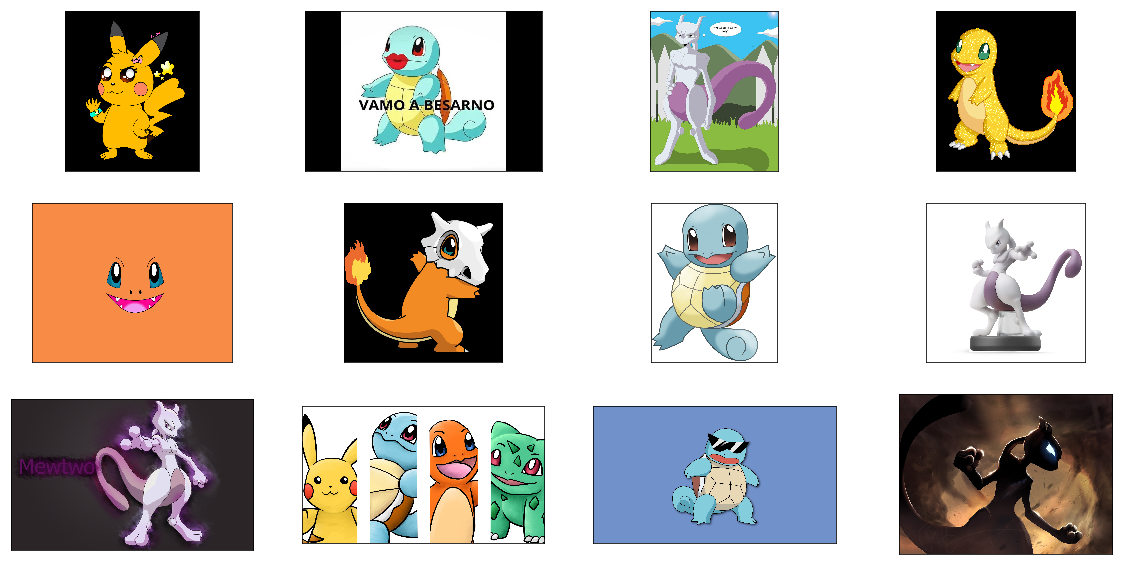

In [21]:
%matplotlib inline

def visualize_img(img_path, ax):
    img = cv2.imread(img_path)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
fig = plt.figure(figsize=(20 ,10))
for i in range(12):
    ax = fig.add_subplot(3, 4, i + 1, xticks=[], yticks=[])
    visualize_img(train_files[i], ax)